In [1]:
import pandas as pd
import numpy as np
import requests
import json
import time
import math
from matplotlib import pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
'''
Data Source: UNComtrade
Document: https://comtrade.un.org/data/doc/api/#DataRequests
Time scope: 2010-Jan ~ 2020-Dec
Description: the total importing and exporting trade value goods of the USA to the rest of the world
Unit: $
'''

import_trade_value = pd.DataFrame(columns = ['Date', 'Import_value'])
export_trade_value = pd.DataFrame(columns = ['Date', 'Export_value'])
                                  
for i in range(2010, 2021):
    for j in range(1, 3):

        url = 'https://comtrade.un.org/api/get'
        method = 'GET'

        '''
        r represents the reporter country, and 842 is the ID of the USA
        ps represents the date
        p represents the partner counrty, and 0 is the ID of the world
        rg represents the trade flow, and the ID of import is 1, and the ID of export is 2
        cc represents the classification code
        freq represents time frequency, and the meaning of M is Monthly
        '''

        querys = 'r=842&ps=' + str(i) + '&p=0&rg=' + str(j) + '&cc=Total&freq=M'
        url = url + '?' + querys
        res = requests.get(url)
        res = res.json()
        time.sleep(1)
        
        if(j == 1):  #Import trade value
            for k in range(len(res['dataset'])):
                import_entry = list()
                import_entry.append(res['dataset'][k]['period'])            
                import_entry.append(res['dataset'][k]['TradeValue'])
                import_trade_value.loc[len(import_trade_value)] = import_entry
        else:  #Export trade value
            for k in range(len(res['dataset'])):
                export_entry = list()
                export_entry.append(res['dataset'][k]['period'])            
                export_entry.append(res['dataset'][k]['TradeValue'])
                export_trade_value.loc[len(export_trade_value)] = export_entry

trade_value = import_trade_value.merge(export_trade_value, how = 'inner')
trade_value.sort_values(by = 'Date', inplace = True, ignore_index = True)

In [3]:
trade_value

,Date,Import_value,Export_value
0,201001,139792954579,92674213944
1,201002,137989527837,93705051356
2,201003,161868067188,110230750991
3,201004,157174114346,102137719916
4,201005,160292896342,105311563308
...,...,...,...
127,202008,209439292560,117958253650
128,202009,212436902064,121378736772
129,202010,226163789343,132402660776
130,202011,219391292326,126854420188


In [5]:
trade_value.to_excel("trade_value_data.xlsx")

### Extract importing and exporting trade value data by API

In [6]:
'''
Data Source: UNComtrade
Document: https://comtrade.un.org/data/doc/api/#DataRequests
Time scope: 2010-Jan ~ 2020-Dec
Description: the total importing and exporting trade value goods of the USA to the rest of the world
Unit: $
'''

import_trade_value = pd.DataFrame(columns = ['Date', 'Import_value'])
export_trade_value = pd.DataFrame(columns = ['Date', 'Export_value'])
                                  
for i in range(2010, 2021):
    for j in range(1, 3):

        url = 'https://comtrade.un.org/api/get'
        method = 'GET'

        '''
        r represents the reporter country, and 842 is the ID of the USA
        ps represents the date
        p represents the partner counrty, and 0 is the ID of the world
        rg represents the trade flow, and the ID of import is 1, and the ID of export is 2
        cc represents the classification code
        freq represents time frequency, and the meaning of M is Monthly
        '''

        querys = 'r=842&ps=' + str(i) + '&p=0&rg=' + str(j) + '&cc=Total&freq=M'
        url = url + '?' + querys
        res = requests.get(url)
        res = res.json()
        time.sleep(1)
        
        if(j == 1):  #Import trade value
            for k in range(len(res['dataset'])):
                import_entry = list()
                import_entry.append(res['dataset'][k]['period'])            
                import_entry.append(res['dataset'][k]['TradeValue'])
                import_trade_value.loc[len(import_trade_value)] = import_entry
        else:  #Export trade value
            for k in range(len(res['dataset'])):
                export_entry = list()
                export_entry.append(res['dataset'][k]['period'])            
                export_entry.append(res['dataset'][k]['TradeValue'])
                export_trade_value.loc[len(export_trade_value)] = export_entry

trade_value = import_trade_value.merge(export_trade_value, how = 'inner')
trade_value.sort_values(by = 'Date', inplace = True, ignore_index = True)

In [7]:
trade_value

,Date,Import_value,Export_value
0,201001,139792954579,92674213944
1,201002,137989527837,93705051356
2,201003,161868067188,110230750991
3,201004,157174114346,102137719916
4,201005,160292896342,105311563308
...,...,...,...
127,202008,209439292560,117958253650
128,202009,212436902064,121378736772
129,202010,226163789343,132402660776
130,202011,219391292326,126854420188


### Manually download GDP data

In [8]:
'''
Data Source: IMF Data
Time scope: 2000-Q1 ~ 2021Q4
Description: the quarter GDP
Unit: $
'''

#Proprocess of the downloaded data
data = pd.read_excel('Gross_Domestic_Product_Nominal_Unad.xlsx')
GDP_value = pd.DataFrame(columns = ['Year', 'Quarter', 'GDP'])

for i in range(len(data.columns)):
    GDP_entry = list()
    year = 2000 + math.floor(i/4)
    GDP_entry.append(year)
    quarter = i + 1 - math.floor(i/4) * 4
    GDP_entry.append(quarter)
    GDP_entry.append(data.iloc[0, i])
    
    GDP_value.loc[len(GDP_value)] = GDP_entry

In [9]:
GDP_value

,Year,Quarter,GDP
0,2000,1,2449139000000
1,2000,2,2569476000000
2,2000,3,2578060000000
3,2000,4,2655679000000
4,2001,1,2562436000000
...,...,...,...
83,2020,4,5490052000000
84,2021,1,5367754000000
85,2021,2,5711844000000
86,2021,3,5822816000000


### Import inflation rate data

In [10]:
inflation_rate = pd.read_csv('inflation.csv')

In [11]:
inflation_rate

,List_number,Date,inflation_rate
0,1,2000-Jan,2.7
1,2,2000-Feb,3.2
2,3,2000-Mar,3.8
3,4,2000-Apr,3.1
4,5,2000-May,3.2
...,...,...,...
259,260,2021-Aug,5.3
260,261,2021-Spe,5.4
261,262,2021-Oct,6.2
262,263,2021-Nov,6.8


### Inflation rate and trade value

#### Linear regression

Import trade value

In [12]:
y = np.array(inflation_rate.loc[120:251, 'inflation_rate'], dtype = float)
x = np.array(trade_value.loc[:, ['Import_value']],dtype = float)
x = pd.DataFrame(x, columns = ['Import_value'])

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.743
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.100
Time:                        19:21:54   Log-Likelihood:                -166.01
No. Observations:                 132   AIC:                             336.0
Df Residuals:                     130   BIC:                             341.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3615      0.828      0.437   

Export trade value

In [13]:
y = np.array(inflation_rate.loc[120:251, 'inflation_rate'], dtype = float)
x = np.array(trade_value.loc[:, ['Export_value']],dtype = float)
x = pd.DataFrame(x, columns = ['Export_value'])

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     6.825
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0100
Time:                        19:21:54   Log-Likelihood:                -164.01
No. Observations:                 132   AIC:                             332.0
Df Residuals:                     130   BIC:                             337.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3971      0.816     -0.486   

#### Polynomial regression (quadratic)

Import trade value

In [14]:
y = np.array(inflation_rate.loc[120:251, 'inflation_rate'], dtype = float)
x = np.array(trade_value.loc[:, ['Import_value']],dtype = float)

polynomial = PolynomialFeatures(2)
x = polynomial.fit_transform(x)
x = pd.DataFrame(x, columns = ['constant', 'Import_value', 'Import_value^2'])

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.586
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.110
Time:                        19:21:54   Log-Likelihood:                -166.09
No. Observations:                 132   AIC:                             336.2
Df Residuals:                     130   BIC:                             341.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant        1.005e-22   4.67e-23      2.

Export trade value

In [15]:
y = np.array(inflation_rate.loc[120:251, 'inflation_rate'], dtype = float)
x = np.array(trade_value.loc[:, ['Export_value']],dtype = float)

polynomial = PolynomialFeatures(2)
x = polynomial.fit_transform(x)
x = pd.DataFrame(x, columns = ['constant', 'Export_value', 'Export_value^2'])

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     6.916
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00957
Time:                        19:21:54   Log-Likelihood:                -163.97
No. Observations:                 132   AIC:                             331.9
Df Residuals:                     130   BIC:                             337.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant        1.578e-22   1.16e-22      1.

### Inflation rate and GDP

In [16]:
#We need to calculate average GDP value for each quarter first

inflation_rate_quarter = pd.DataFrame(columns = ['Date', 'Inflation_rate'])
for i in range(int(len(inflation_rate)/3)):
    inflation_entry = list()
    year = 2000 + math.floor(i/4)
    quarter = i - math.floor(i/4) * 4 + 1
    inflation_entry.append(str(year) + 'Q' + str(quarter))
    inflation_entry.append(inflation_rate.loc[3*i : 3*i+3, 'inflation_rate'].mean())
    inflation_rate_quarter.loc[len(inflation_rate_quarter)] = inflation_entry

#### Linear regression

In [17]:
y = np.array(inflation_rate_quarter['Inflation_rate'], dtype = float)
x = np.array(GDP_value['GDP'],dtype = float)
x = pd.DataFrame(x, columns = ['GDP'])

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3351
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.564
Time:                        19:21:54   Log-Likelihood:                -149.91
No. Observations:                  88   AIC:                             303.8
Df Residuals:                      86   BIC:                             308.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6102      0.634      4.114      0.0

#### Polynomial regression (quadratic)

In [18]:
y = np.array(inflation_rate_quarter['Inflation_rate'], dtype = float)
x = np.array(GDP_value['GDP'],dtype = float).reshape(-1, 1)

polynomial = PolynomialFeatures(2)
x = polynomial.fit_transform(x)

x = pd.DataFrame(x, columns = ['constant', 'GDP', 'GDP^2'])

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.079
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    -6.314
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               1.00
Time:                        19:21:54   Log-Likelihood:                -153.44
No. Observations:                  88   AIC:                             310.9
Df Residuals:                      86   BIC:                             315.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    5.355e-25   9.12e-26      5.870      0.0

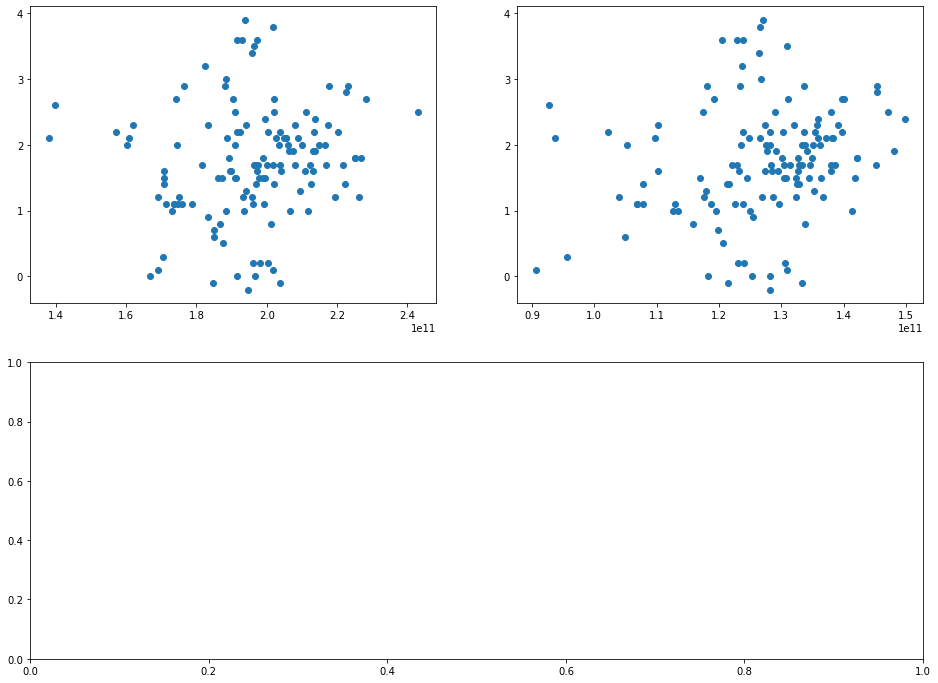

In [20]:
y = np.array(inflation_rate.loc[120:251, 'inflation_rate'], dtype = float)
x1 = np.array(trade_value.loc[:, ['Import_value']],dtype = float)
x2 = np.array(trade_value.loc[:, ['Export_value']],dtype = float)

fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 12))

ax1 = plt.subplot(2, 2, 1)
ax1.scatter(x1, y)
plt.xlabel('AT')
plt.ylabel('PE')

ax2 = plt.subplot(2, 2, 2)
ax2.scatter(x2, y)

In [ ]:
plt.figure(figsize = (20,6))
xlabel = np.array(inflation_rate.loc[120:251, 'Date'], dtype = float)
plt.plot(xlabel, model_knn_train_MSE_list, label = 'train_MSE')
plt.plot(xlabel, model_knn_test_MSE_list, label = 'test_MSE')
plt.legend(fontsize = 15)
plt.title('Train MSE and test MSE of KNN', fontsize = 20)
plt.xlabel('1/k', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()

Different president's term of office

In [19]:
data = pd.read_csv('data_all.csv')
y = np.array(data.loc[60:108, 'inflation_rate'], dtype = float)
x = np.array(data.loc[60:108, 'unemploment rate'],dtype = float)
x = pd.DataFrame(x, columns = ['unemploment rate'])

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     79.40
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.40e-11
Time:                        00:35:19   Log-Likelihood:                -20.473
No. Observations:                  48   AIC:                             44.95
Df Residuals:                      46   BIC:                             48.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8789      0.122  

In [7]:
data

,Unnamed: 0,Date,inflation_rate,house_price,Import_value,Export_value,unemploment rate
0,0,2012-Jan,2.9,163297,1.882250e+11,1.181570e+11,8.3
1,1,2012-Feb,2.9,163187,1.763380e+11,1.234490e+11,8.3
2,2,2012-Mar,2.7,163356,2.020890e+11,1.397610e+11,8.2
3,3,2012-Apr,2.3,163679,1.942210e+11,1.273770e+11,8.2
4,4,2012-May,1.7,164156,2.037030e+11,1.314570e+11,8.2
...,...,...,...,...,...,...,...
103,103,2020-Aug,1.3,257022,2.094390e+11,1.179580e+11,8.4
104,104,2020-Sep,1.4,259531,2.124370e+11,1.213790e+11,7.9
105,105,2020-Oct,1.2,262350,2.261640e+11,1.324030e+11,6.9
106,106,2020-Nov,1.2,265374,2.193910e+11,1.268540e+11,6.7
